# MAT245 Lab 8

## Curse of dimensionality - volume of a hypercube

Suppose we have a $p$-dimensional dataset containing $N$ observations that we've normalized so that all points are contained in the $p$-dimensional unit cube. Fix a target data point $x_0$, and say we send out a hypercubical neighborhood $C(x_0)$ about $x_0$ to capture a fraction $r$ of the observations. In other words, we want to consider a cubical neighbourhood of $x_0$ with volume $0 < r < 1$ (see image below for an example with $x_0 = 0$).

<img src="cube.png">

The volume of a $p$-dimensional cube with side-length $l$ is given by $l^n$, so we will have to choose the side-length of our smaller cube $C(x_0)$ to be $r^\frac{1}{p}$.

If we add the additional assumption that the points in our dataset are uniformly distributed, we can compute the median distance from the origin to the closest data point by

$$
d(p, N) = \left( 1 - \frac{1}{2^{\frac{1}{N}}}\right)^{\frac{1}{p}}.
$$

[Formula Explanation](https://stats.stackexchange.com/questions/130998/explanation-of-formula-for-median-closest-point-to-origin-of-n-samples-from-unit) for hypersphere, follows for hypercube.

#### Goals (1):

- For $p = 2, 10,$ and $100$, plot the side-length of $C(x_0)$ against the fraction of the $p$-unit cube covered by $C(x_0)$. 
- For fixed $N$, say $N = 500$, plot $p \mapsto d(p, 500)$ as $p$ ranges between $0 < p < 100$.

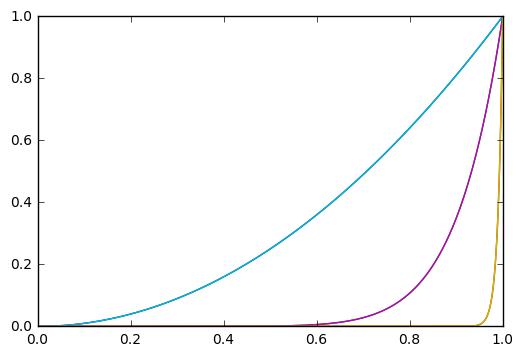

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sidelength(r,p):
    return r**(1.0/p)

x = np.arange(0, 1, 0.001)

plt.figure(1)
plt.plot(sidelength(x, 2), x)
plt.plot(sidelength(x, 10), x)
plt.plot(sidelength(x, 100), x)
plt.show()


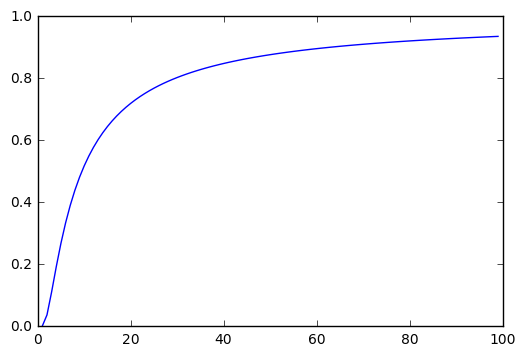

In [7]:
def d(p, N):
    return (1 - (1.0/(2**(1.0/N))))**(1.0/p)
    
px = np.arange(1, 100, 1)

plt.plot(px, d(px, 500))
plt.show()

## Random Gaussian vectors become orthogonal in high dimension.

Suppose $Y$ and $Z$ are $p$-dimensional random vectors where each entry has been drawn from the standard normal distribution $\mathcal{N}(0, 1)$. In other words

$$
Y_i \sim \mathcal{N}(0, 1) \quad \text{and} \quad Z_i \sim \mathcal{N}(0, 1) \quad \forall i.
$$

It turns out that as $d \to \infty$, the dot product of the normalized vectors $\widehat{Y} = Y / \|Y\|$ and $\widehat{Z} = Z / \|Z\|$ tends to zero. In other words $\widehat{Y}$ and $\widehat{Z}$ become approximately orthogonal in high dimension. Our next goal is to verify this empirically. 

#### Goals (2):

- For $p = 2, 10, 100$, generate $1000$ samples of $Y$ and $Z$ and create a histogram of the resulting dot products $\widehat{Y} \cdot \widehat{Z}$.

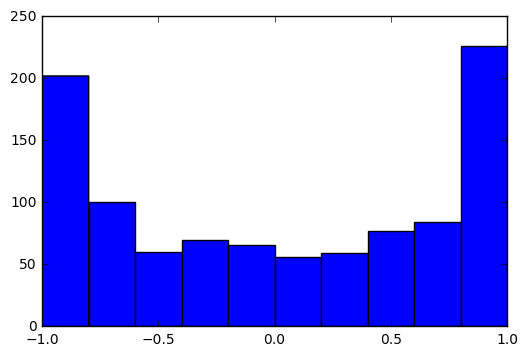

In [16]:
def histdot(p):
    dot = np.zeros(1000)
    for i in range(1,1000):
                x = np.random.normal(0, 1, p)
                y = np.random.normal(0, 1, p)
                xnorm = x/np.linalg.norm(x)
                ynorm = y/np.linalg.norm(y)
                dot[i] = np.dot(xnorm, ynorm)
    plt.hist(dot)
    
plt.show(histdot(2))

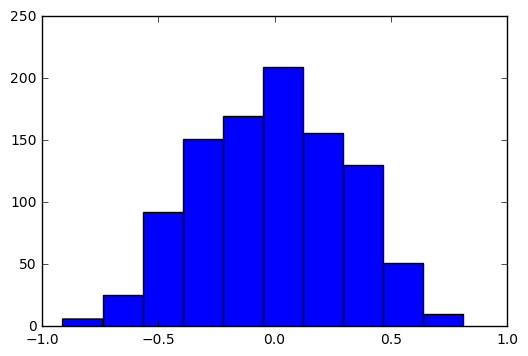

In [17]:
plt.show(histdot(10))

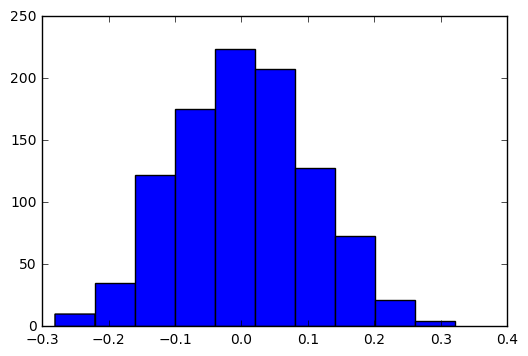

In [18]:
plt.show(histdot(100))

## Dimensionality reduction using random projections.

As we saw above, high dimensional data can cause quite a few problems. We'll now explore a few ways of reducing dimensionality. 

Suppose again that we have a $p$-dimensional dataset for large $p$, and we want to reduce the number of dimensions to $n$ for $n << p$. One way of approaching this problem is via random projections. A random projection $M$ in this case would be a $p \times n$ matrix whose entries are chosen at random. If $u \in \mathbb{R}^p$ is a point in our dataset, we compute its projection $\widehat{u} \in \mathbb{R}^n$ with the following matrix multiplication:

$$
\widehat{u} = u^T \cdot M.
$$

However, we don't want to choose just any random matrix $M$. Ideally, we would like our projection to preserve distances between points in our dataset. We can do this by choosing the matrix $M$ to be one of the following kinds:

- A **Gaussian random projection** is given by drawing the entries of $M$ from the normal distrbution $\mathcal{N}(0, 1/n)$ (recall $n$ is the dimension of the target space, also referred to as the number of components of the projection).

- An **Achlioptas random projection** is given by drawing the entries of $M_{ij}$ of $M$ according to 

$$
M_{ij} = \begin{cases}
  \sqrt{3}  \quad &\text{with probability } &\frac{1}{6} \\
  0         \quad &\text{..}                &\frac{2}{3} \\
  -\sqrt{3} \quad &\text{..}                &\frac{1}{6}.
\end{cases}
$$

If $u, v \in \mathbb{R}^p$ are points in our dataset, then projections like those above satisfy bounds of the form

$$
(1 - \epsilon) \| u - v \|^2
  \leq
\| Mu - Mv \|^2
  \leq
(1 + \epsilon) \|u - v\|^2.
$$

The relationship between the dimension $n$ of the target space, the number of samples in our dataset, and $\epsilon$ is given by

$$
 n = \frac{4\log(\text{number of samples})}{\epsilon^2/2 - \epsilon^3 /3}.
$$

Typically the number of samples is given, and so we just compute $n$ as a function of $\epsilon$. 

#### Goals (3)

- Supposing we have a $10000$-dimensional dataset with only $10$ samples, and we want $\epsilon = 0.1$, verify that the Gaussian and Achlioptas projections satisfy the bound given above (with these numbers, we need to choose $n$ > 857). 

In [31]:
def gauss_proj(u,n):
    p = len(u)
    M = np.random.normal(0, 1.0/np.sqrt(n), size = (p,n))
    return np.dot(u.T, M)
    

def achlio_proj(u,n):
    x = ((3)**(1.0/2), 0, -(3)**(1.0/2))
    p = (1.0/6.0, 2.0/3, 1.0/6)
    M = np.random.choice(x, size = (len(u), n), p = p)
    M = M/np.sqrt(n)
    return np.dot(u.T, M)
    
def checkbound_gauss(u,v, eps):
    tmp = (np.linalg.norm(gauss_proj(u, 857) - gauss_proj(v, 857)))**2
    lower = (1 - eps)*np.linalg.norm(u - v)**2
    upper = (1 + eps)*np.linalg.norm(u - v)**2
    print(tmp, lower, upper)
    if tmp >= lower and tmp <= upper:
        return True
    else:
        return False

def checkbound_achlio(u,v, eps):
    tmp = (np.linalg.norm(achlio_proj(u, 857) - achlio_proj(v, 857)))**2
    lower = (1 - eps)*np.linalg.norm(u - v)**2
    upper = (1 + eps)*np.linalg.norm(u - v)**2
    print(tmp, lower, upper)
    if tmp >= lower and tmp <= upper:
        return True
    else:
        return False
        
u = np.random.normal(0, 10, 10000)
v = np.random.normal(0, 10, 10000)

checkbound_gauss(u, v, 0.1)

(2021634.6204724845, 1833086.5007464681, 2240439.0564679056)


True

In [32]:
checkbound_achlio(u, v, 0.1)

(1890223.5064215402, 1833086.5007464681, 2240439.0564679056)


True